# WeatherPy
----

#### Observation 1


#### Observation 2


#### Observation 3


In [1]:
# Dependencies
import pandas as pd
import numpy as np
from citipy import citipy
from random import uniform
from scipy import stats as st
import datetime
import matplotlib.pyplot as plt
import requests
import json
from pathlib import Path

# Import API keys
from api_keys import (weather_api_key, g_key)

## Function Block

In [2]:
def randLatLong():
    Lat = uniform(-90,90)
    Lng = uniform(-180,180)
    return Lat, Lng

## Generate Cities List

In [3]:
numCities = 750
cityList = []
for x in range(numCities):
    cityList.append(randLatLong())

cityName = []
cityCountry = []
for city in cityList:
    lat = city[0]
    lng = city[1]
    city = citipy.nearest_city(lat, lng)
    cityName.append(city.city_name)
    cityCountry.append(city.country_code)
city_df = pd.DataFrame(data = cityList)
city_df['CityName'] = cityName
city_df['CountryCode'] = cityCountry
city_df.columns = ['Lat Guess', 'Long Guess', 'CityName','CountryCode']
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Lat Real'] = ''
city_df['Long Real'] = ''
city_df['Datetime'] = ''
city_df.head()

,Lat Guess,Long Guess,CityName,CountryCode,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real,Datetime
0,59.933350,-7.833893,vagur,fo,,,,,,,
1,44.473937,25.474566,gratia,ro,,,,,,,
2,-0.258064,-158.032534,faanui,pf,,,,,,,
3,63.368159,-85.493128,attawapiskat,ca,,,,,,,
4,46.452163,60.144540,kazalinsk,kz,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Outputting sample query to be able to look at json format
qry = query_url + city_df['CityName'][0] + ',' + city_df['CountryCode'][0]
print(qry)

http://api.openweathermap.org/data/2.5/weather?appid=30f405648767c0f1706e75e615852de5&units=imperial&q=vagur,fo


In [6]:
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
date = []
for index,row in city_df.iterrows():
    print(f'Working on City Number {index}: {row[2]}, {row[3]}')
    try:
        response = requests.get(query_url + row[2] + ',' + row[3]).json()
        city_df['Lat Real'][index] = response['coord']['lat']
        city_df['Long Real'][index] = response['coord']['lon']
        city_df['Temperature'][index] = response['main']['temp_max']
        city_df['Humidity'][index] = response['main']['humidity']
        city_df['Cloudiness'][index] = response['clouds']['all']
        city_df['Wind Speed'][index] = response['wind']['speed']
        city_df['Datetime'][index] = response['dt']
    except:
        city_df['Lat Real'][index] = np.nan
        city_df['Long Real'][index] = np.nan
        city_df['Temperature'][index] = np.nan
        city_df['Humidity'][index] = np.nan
        city_df['Cloudiness'][index] = np.nan
        city_df['Wind Speed'][index] = np.nan
        city_df['Datetime'][index] = np.nan
        print('')
        print(f'City Number is missing data')
        print('')

Working on City Number 0: vagur, fo
Working on City Number 1: gratia, ro


<ipython-input-6-ecb3430c9005>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Lat Real'][index] = response['coord']['lat']
<ipython-input-6-ecb3430c9005>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Long Real'][index] = response['coord']['lon']
<ipython-input-6-ecb3430c9005>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Temperature'][index] = response['main']['temp_max']
<ipython-input-6-ecb3430c9

Working on City Number 2: faanui, pf
Working on City Number 3: attawapiskat, ca

City Number is missing data

Working on City Number 4: kazalinsk, kz


<ipython-input-6-ecb3430c9005>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Lat Real'][index] = np.nan
<ipython-input-6-ecb3430c9005>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Long Real'][index] = np.nan
<ipython-input-6-ecb3430c9005>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_df['Temperature'][index] = np.nan
<ipython-input-6-ecb3430c9005>:23: SettingWithCopyWarning: 
A value is trying to be 


City Number is missing data

Working on City Number 5: rikitea, pf
Working on City Number 6: vaini, to
Working on City Number 7: tuktoyaktuk, ca
Working on City Number 8: kamenka, ru
Working on City Number 9: albany, au
Working on City Number 10: warqla, dz

City Number is missing data

Working on City Number 11: georgetown, sh
Working on City Number 12: mahebourg, mu
Working on City Number 13: natchez, us
Working on City Number 14: nizwa, om
Working on City Number 15: bubaque, gw
Working on City Number 16: new norfolk, au
Working on City Number 17: mataura, pf

City Number is missing data

Working on City Number 18: namatanai, pg
Working on City Number 19: hobart, au
Working on City Number 20: castro, cl
Working on City Number 21: paidha, ug
Working on City Number 22: cidreira, br
Working on City Number 23: inhambane, mz
Working on City Number 24: alice springs, au
Working on City Number 25: cape town, za
Working on City Number 26: georgetown, sh
Working on City Number 27: bone, id
W

Working on City Number 192: carinhanha, br
Working on City Number 193: saint george, bm
Working on City Number 194: brigantine, us
Working on City Number 195: mount gambier, au
Working on City Number 196: busselton, au
Working on City Number 197: illoqqortoormiut, gl

City Number is missing data

Working on City Number 198: longyearbyen, sj
Working on City Number 199: kudahuvadhoo, mv
Working on City Number 200: busselton, au
Working on City Number 201: vaini, to
Working on City Number 202: pisco, pe
Working on City Number 203: victoria, sc
Working on City Number 204: bandarbeyla, so
Working on City Number 205: cape town, za
Working on City Number 206: padang, id
Working on City Number 207: vila franca do campo, pt
Working on City Number 208: busselton, au
Working on City Number 209: rio gallegos, ar
Working on City Number 210: dongying, cn
Working on City Number 211: mahebourg, mu
Working on City Number 212: victoria, sc
Working on City Number 213: rikitea, pf
Working on City Number 2

Working on City Number 379: praya, id
Working on City Number 380: vengurla, in
Working on City Number 381: salalah, om
Working on City Number 382: busselton, au
Working on City Number 383: norman wells, ca
Working on City Number 384: east london, za
Working on City Number 385: busselton, au
Working on City Number 386: wa, gh
Working on City Number 387: atuona, pf
Working on City Number 388: beyneu, kz
Working on City Number 389: clyde river, ca
Working on City Number 390: nadvoitsy, ru
Working on City Number 391: bilibino, ru
Working on City Number 392: padang, id
Working on City Number 393: kinablangan, ph
Working on City Number 394: sulangan, ph
Working on City Number 395: iwanai, jp
Working on City Number 396: calama, cl
Working on City Number 397: thompson, ca
Working on City Number 398: tuktoyaktuk, ca
Working on City Number 399: sao joao da barra, br
Working on City Number 400: goderich, sl

City Number is missing data

Working on City Number 401: georgetown, sh
Working on City N

Working on City Number 565: rikitea, pf
Working on City Number 566: bluff, nz
Working on City Number 567: nelson bay, au
Working on City Number 568: barentsburg, sj

City Number is missing data

Working on City Number 569: illoqqortoormiut, gl

City Number is missing data

Working on City Number 570: madang, pg
Working on City Number 571: mantua, cu
Working on City Number 572: katsuura, jp
Working on City Number 573: nelson bay, au
Working on City Number 574: bluff, nz
Working on City Number 575: yulara, au
Working on City Number 576: saint-philippe, re
Working on City Number 577: qaanaaq, gl
Working on City Number 578: atuona, pf
Working on City Number 579: georgetown, sh
Working on City Number 580: iquitos, pe
Working on City Number 581: lavrentiya, ru
Working on City Number 582: katangli, ru
Working on City Number 583: hithadhoo, mv
Working on City Number 584: san quintin, mx
Working on City Number 585: pangnirtung, ca
Working on City Number 586: tasiilaq, gl
Working on City Number 

In [7]:
cols = ['Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Lat Real', 'Long Real', 'Datetime']
city_df[cols].replace('', np.nan, inplace=True)
city_df.dropna(how='any', inplace=True)
city_df.head(100)

C:\Users\Cam Foster\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Lat Guess,Long Guess,CityName,CountryCode,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real,Datetime
0,59.933350,-7.833893,vagur,fo,48.69,86,100,21.59,61.47,-6.81,1603849184
1,44.473937,25.474566,gratia,ro,57,93,90,4.7,44.43,25.45,1603849184
2,-0.258064,-158.032534,faanui,pf,79.65,83,100,18.72,-16.48,-151.75,1603849184
5,-28.117164,-105.514850,rikitea,pf,75.52,83,100,15.48,-23.12,-134.97,1603849184
6,-18.473594,-178.352367,vaini,to,77,78,75,16.11,-21.2,-175.2,1603849184
...,...,...,...,...,...,...,...,...,...,...,...
109,19.967080,-84.998442,cozumel,mx,82.4,88,75,17.22,20.51,-86.95,1603849192
110,-50.693534,-78.247623,punta arenas,cl,42.8,75,0,26.4,-53.15,-70.92,1603849191
111,-78.426394,-175.079586,vaini,to,77,78,75,16.11,-21.2,-175.2,1603849184
112,49.962696,127.639737,blagoveshchensk,ru,33.8,78,75,4.47,50.27,127.53,1603849042


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df[cols] = city_df[cols].astype(float)
city_df.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real,Datetime
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,6.740000e+02
mean,-0.442649,5.864985,57.792181,74.280415,57.866469,8.855712,7.021320,7.160134,1.603849e+09
std,50.750339,101.519291,21.773875,17.349052,39.061843,6.106412,40.007483,100.223064,8.368029e+01
min,-89.388553,-179.980520,-6.480000,10.000000,0.000000,0.270000,-54.800000,-175.200000,1.603849e+09
25%,-44.169411,-82.243928,46.400000,66.000000,20.000000,3.940000,-33.017500,-70.920000,1.603849e+09
50%,0.074454,5.140637,62.840000,77.000000,75.000000,7.115000,-0.600000,18.420000,1.603849e+09
75%,43.819007,94.592304,75.520000,87.000000,96.000000,12.750000,42.780000,102.445000,1.603849e+09
max,89.984319,179.196597,88.570000,100.000000,100.000000,48.940000,78.220000,177.480000,1.603849e+09


In [9]:
printpath = Path.cwd() / 'cities.csv'
city_df.to_csv(printpath, index=False)

In [10]:
parentpath = Path(Path.cwd()).parents[0] / 'VacationPy' / 'cities.csv'
city_df.to_csv(parentpath, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This plot shows the maximum temperature for the date requested versus latitude. The equator (Latitude of 0 degrees) is generally hotter and temperatures drop as you move closer to the poles. The northern hemisphere appears to have a wider range of temperatures. 

In [13]:
# We assume that all data was pulled on the same date, so just grab one datetime
day = datetime.datetime.fromtimestamp(int(city_df['Datetime'][0])).strftime('%Y-%m-%d')

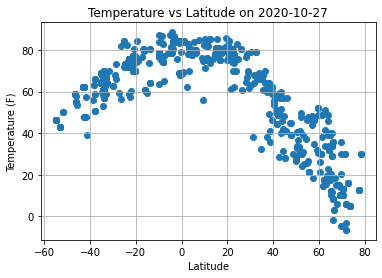

In [14]:
scat1 = plt.scatter(city_df['Lat Real'], city_df['Temperature'])
scat1 = plt.xlabel('Latitude')
scat1 = plt.ylabel('Temperature (F)')
scat1 = plt.title(f"Temperature vs Latitude on {day}")
scat1 = plt.grid(True)
plt.savefig(f"Temperature Vs Latitude {day}.png")

## Latitude vs. Humidity Plot
This plot shows the % humidity for the date requested versus latitude. There is not a clearly obvious trend, but it does appear that the extreme north latitudes in general have >90% humidity. 

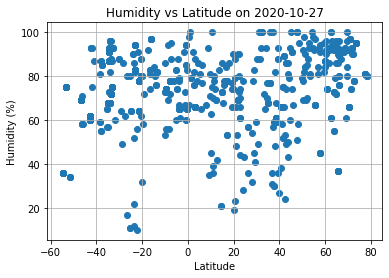

In [15]:
scat2 = plt.scatter(city_df['Lat Real'], city_df['Humidity'])
scat2 = plt.xlabel('Latitude')
scat2 = plt.ylabel('Humidity (%)')
scat2 = plt.title(f"Humidity vs Latitude on {day}")
scat2 = plt.grid(True)
plt.savefig(f"Humidity Vs Latitude {day}.png")

## Latitude vs. Cloudiness Plot
This plot shows % cloudiness for the date requested versus latitude. There is no obvious trend based on latitude, but it does appear that the % cloudiness tends to the extremes of 0 and 100 percent. 

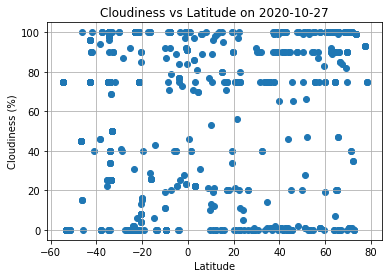

In [16]:
scat3 = plt.scatter(city_df['Lat Real'], city_df['Cloudiness'])
scat3 = plt.xlabel('Latitude')
scat3 = plt.ylabel('Cloudiness (%)')
scat3 = plt.title(f"Cloudiness vs Latitude on {day}")
scat3 = plt.grid(True)
plt.savefig(f"Cloudiness Vs Latitude {day}.png")

## Latitude vs. Wind Speed Plot
This plot shows wind speed (mph) for the date requested versus latitude. There is no obvious correlation for this metric.

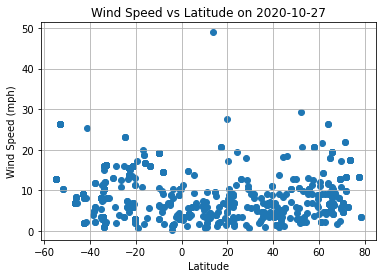

In [17]:
scat4 = plt.scatter(city_df['Lat Real'], city_df['Wind Speed'])
scat4 = plt.xlabel('Latitude')
scat4 = plt.ylabel('Wind Speed (mph)')
scat4 = plt.title(f"Wind Speed vs Latitude on {day}")
scat4 = plt.grid(True)
plt.savefig(f"Wind Speed Vs Latitude {day}.png")

## Linear Regression

In [18]:
northCities = city_df.loc[city_df['Lat Real'] > 0]
southCities = city_df.loc[city_df['Lat Real'] < 0]

In [19]:
northCities.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real,Datetime
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,3.320000e+02
mean,44.111266,-2.186973,48.410843,75.060241,60.328313,7.940873,42.941898,-1.377801,1.603849e+09
std,24.833921,100.792870,25.938618,18.549908,39.924521,5.861882,22.240677,96.735331,7.485446e+01
min,-2.704400,-178.572091,-6.480000,19.000000,0.000000,0.760000,0.530000,-173.300000,1.603849e+09
25%,22.628944,-85.301355,29.160000,66.000000,20.000000,4.090000,22.560000,-75.712500,1.603849e+09
50%,44.322693,-10.791678,48.990000,78.000000,75.000000,6.490000,43.290000,-9.220000,1.603849e+09
75%,63.879059,85.405744,75.205000,91.000000,99.000000,10.290000,63.977500,80.550000,1.603849e+09
max,89.984319,179.196597,86.000000,100.000000,100.000000,48.940000,78.220000,177.480000,1.603849e+09


In [20]:
southCities.describe()

,Lat Guess,Long Guess,Temperature,Humidity,Cloudiness,Wind Speed,Lat Real,Long Real,Datetime
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,3.420000e+02
mean,-43.693817,13.681506,66.899211,73.523392,55.476608,9.743801,-27.848947,15.448421,1.603849e+09
std,25.995556,101.757771,10.664945,16.089132,38.112094,6.215508,14.250484,102.961367,8.939073e+01
min,-89.388553,-179.980520,39.200000,10.000000,0.000000,0.270000,-54.800000,-175.200000,1.603849e+09
25%,-65.833513,-68.777248,60.800000,67.000000,22.000000,3.440000,-35.020000,-68.772500,1.603849e+09
50%,-43.957811,15.063185,66.165000,75.000000,75.000000,9.070000,-32.720000,19.635000,1.603849e+09
75%,-23.286670,102.100462,75.520000,84.750000,92.000000,15.480000,-20.410000,115.330000,1.603849e+09
max,11.025357,178.748160,88.570000,97.000000,100.000000,26.400000,-0.360000,173.170000,1.603849e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8284


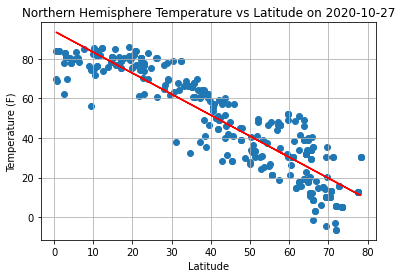

In [21]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Temperature'])
print(f'The r-value is {rvalue**2:0.4f}')
scat5 = plt.scatter(northCities['Lat Real'], northCities['Temperature'])
scat5 = plt.xlabel('Latitude')
scat5 = plt.ylabel('Temperature (F)')
scat5 = plt.title(f"Northern Hemisphere Temperature vs Latitude on {day}")
scat5 = plt.grid(True)
lineq5 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq5, color='red')
plt.savefig(f"Northern Hemisphere Temperature Vs Latitude {day}.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.8498


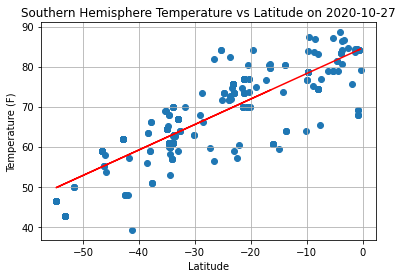

In [22]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Temperature'])
print(f'The r-value is {rvalue:0.4f}')
scat6 = plt.scatter(southCities['Lat Real'], southCities['Temperature'])
scat6 = plt.xlabel('Latitude')
scat6 = plt.ylabel('Temperature (F)')
scat6 = plt.title(f"Southern Hemisphere Temperature vs Latitude on {day}")
scat6 = plt.grid(True)
lineq6 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq6, color='red')
plt.savefig(f"Southern Hemisphere Temperature Vs Latitude {day}.png")

#### Max Temperature for Northern and Southern Hemispheres

These plots both show what is known for most humans, that temperatures decrease as you move away from the equator. The Northern hemisphere tends to get futher to the cold extreme, but that is likely due to how populations are distributed with people living closer to the artic circle than the antarctic circle. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3092


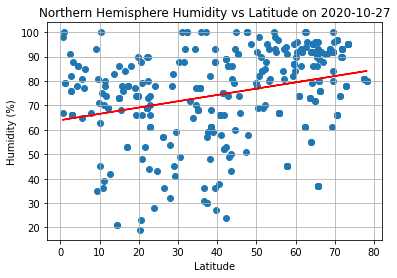

In [23]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Humidity'])
print(f'The r-value is {rvalue:0.4f}')
scat7 = plt.scatter(northCities['Lat Real'], northCities['Humidity'])
scat7 = plt.xlabel('Latitude')
scat7 = plt.ylabel('Humidity (%)')
scat7 = plt.title(f"Northern Hemisphere Humidity vs Latitude on {day}")
scat7 = plt.grid(True)
lineq7 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq7, color='red')
plt.savefig(f"Northern Hemisphere Humidity Vs Latitude {day}.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2694


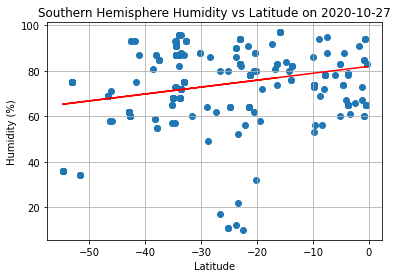

In [24]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Humidity'])
print(f'The r-value is {rvalue:0.4f}')
scat8 = plt.scatter(southCities['Lat Real'], southCities['Humidity'])
scat8 = plt.xlabel('Latitude')
scat8 = plt.ylabel('Humidity (%)')
scat8 = plt.title(f"Southern Hemisphere Humidity vs Latitude on {day}")
scat8 = plt.grid(True)
lineq8 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq8, color='red')
plt.savefig(f"Southern Hemisphere Humidity Vs Latitude {day}.png")

#### % Humidity for Northern and Southern Hemispheres
These two plots show humidity split between northern and southern hemispheres. The linear regressions show that humidity is weakly, positively correllated with latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1597


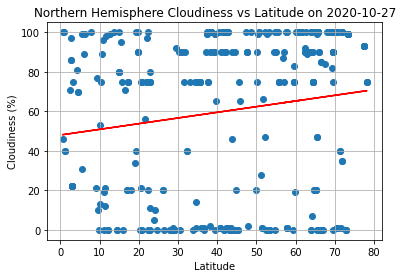

In [25]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Cloudiness'])
print(f'The r-value is {rvalue:0.4f}')
scat9 = plt.scatter(northCities['Lat Real'], northCities['Cloudiness'])
scat9 = plt.xlabel('Latitude')
scat9 = plt.ylabel('Cloudiness (%)')
scat9 = plt.title(f"Northern Hemisphere Cloudiness vs Latitude on {day}")
scat9 = plt.grid(True)
lineq9 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq9, color='red')
plt.savefig(f"Northern Hemisphere Cloudiness Vs Latitude {day}.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0137


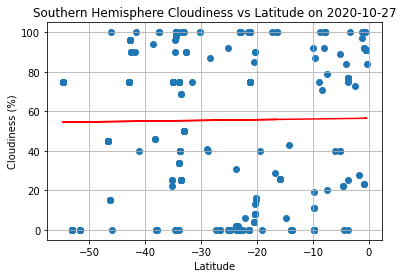

In [26]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Cloudiness'])
print(f'The r-value is {rvalue:0.4f}')
scat10 = plt.scatter(southCities['Lat Real'], southCities['Cloudiness'])
scat10 = plt.xlabel('Latitude')
scat10 = plt.ylabel('Cloudiness (%)')
scat10 = plt.title(f"Southern Hemisphere Cloudiness vs Latitude on {day}")
scat10 = plt.grid(True)
lineq10 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq10, color='red')
plt.savefig(f"Southern Hemisphere Cloudiness Vs Latitude {day}.png")

#### % Cloudiness for Northern and Southern Hemispheres
something

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.2382


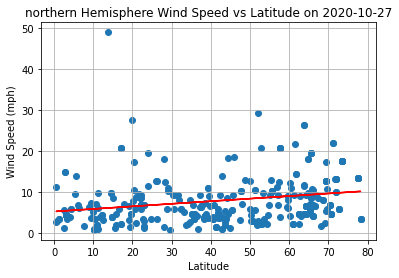

In [27]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(northCities['Lat Real'], northCities['Wind Speed'])
print(f'The r-value is {rvalue:0.4f}')
scat11 = plt.scatter(northCities['Lat Real'], northCities['Wind Speed'])
scat11 = plt.xlabel('Latitude')
scat11 = plt.ylabel('Wind Speed (mph)')
scat11 = plt.title(f"northern Hemisphere Wind Speed vs Latitude on {day}")
scat11 = plt.grid(True)
lineq11 = slope * northCities['Lat Real'] + intercept
plt.plot(northCities['Lat Real'], lineq11, color='red')
plt.savefig(f"Northern Hemisphere Wind Speed Vs Latitude {day}.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.0829


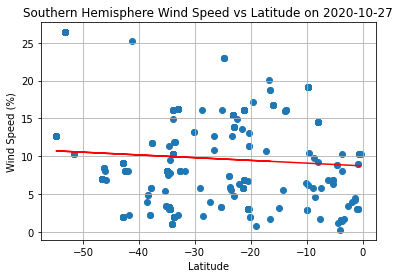

In [28]:
slope, intercept, rvalue, pvalue, stderr = st.linregress(southCities['Lat Real'], southCities['Wind Speed'])
print(f'The r-value is {rvalue:0.4f}')
scat9 = plt.scatter(southCities['Lat Real'], southCities['Wind Speed'])
scat9 = plt.xlabel('Latitude')
scat9 = plt.ylabel('Wind Speed (%)')
scat9 = plt.title(f"Southern Hemisphere Wind Speed vs Latitude on {day}")
scat9 = plt.grid(True)
lineq9 = slope * southCities['Lat Real'] + intercept
plt.plot(southCities['Lat Real'], lineq9, color='red')
plt.savefig(f"Southern Hemisphere Wind Speed Vs Latitude {day}.png")

#### Wind Speed (mph) for Northern and Southern Hemispheres
Something